In [ ]:
#KCHouse Dataset

#**OVERVIEW OF DATASET**
Data Set: King County housing data from Kaggle
Number of Instances: 21,613
Number of Attributes: 21

The target variable is the sale price of the house. The remaining variables are all potential predictors of the sale price. The data is a good source for understanding the factors that affect house prices in King County. It can be used to develop models to predict house prices or to understand the factors that are most important for determining house prices and can be used by real estate agents, appraisers, and investors to make more informed decisions about the value of houses.





In [ ]:
#OBJECTIVES

# PROJECT OVERVIEW:
This project involves the analysis of the King County housing data , focusing on various aspects of factors that may affect the house prices. The dataset contains information about attributes such as grade, size, rooms and more.

This project aims to gain insights into the KC Housing dataset and develop machine learning models to predict hpusing prices. By analyzing various factors and  make predictions using different machine learning techniques.



# Objectives

1. Data preprocessing and cleaning: This includes tasks such as removing missing values, imputing missing values, handling outliers, and standardizing the data.
2. Explore and visualize the data for insights: This includes tasks such as creating histograms, boxplots, and scatterplots to visualize the distribution of the data and identify any relationships between the variables.
3. Build and evaluate supervised machine learning models for predicting house prices: This includes tasks such as choosing the right machine learning algorithm, training the model, and evaluating the model's performance using metrics such as accuracy, precision, and recall.
4. Perform clustering and dimensionality reduction for unsupervised analysis: This includes tasks such as clustering the houses into groups based on their similarities and reducing the dimensionality of the data to make it easier to visualize and interpret.
5. Apply ensemble techniques like bagging and boosting: This includes tasks such as combining multiple machine learning models to improve the overall performance of the model.
6. Evaluate model performance using mean squared error: This includes calculating the mean squared error (MSE) of the model to measure how well it predicts the actual house prices.
7. Provide conclusions and insights based on the analysis: This includes summarizing the findings of the analysis and discussing the implications of the findings.


#Observation


1. There were no missing values in the data.
2. The data was explored and visualized to gain insights into the relationships between the different features. This included creating histograms, scatter plots, and correlation matrices and a descriptive analysis was conducted and insights from the data was gathered.
3. Pre processing and cleaning of the data was done to make the data simple and easy to conduct machine learning algorythms including change of data types, removing duplicates etc.
4. The house were clustered on the basis of size by placing he houses in three categories: Small, Medium, Large.
5. The data was then standardized by max min scaling to treat outliers in the data.
6. The data was split into features and target and then into training and testing sets. Individual models were intialised and train them and predict on test data and calculate accuracy of the data through supervised learning which came out to be 99%
7. The data was clustered and PCA analysis was conducted to reduce the dimensionality in the data.
8. The variables in the data was found to have strong relationship as they wereclustered together in the scatter plot.
9. The first principal component explains 40% of the variance in the data.
10. The pipeline was build using  Random Forrest, AdaBoost and Gradient Boost.Pipeline Accuracy with AdaBoost came out to be 0.80.
11.Gradient boosting model accuracy is 100% on the test data.
12. The Model is able to achieve highest accuracy even though the data is not perfectly clean
13. The 10 most important features came out to be Grade,sqft_living15 , sqft_living , total_sqft , price ,sqft_above ,price_encoded , yr_built , house_age , sqft_lot from most important to least important features
14. BaggingClassifier model with a Random Forest base estimator gave the accuracy for the dataset to be 99.2% model
15. The accuracy for the model with bagging with gradient boosting came out to be 100%
16. As the value of max_depth increases, mean square error decreases indicating overfitting

In [ ]:
# 1.0 import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
import re

# 1.0.1
# Prepare for modeling and metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

from sklearn.metrics import accuracy_score
# Handle missing data
from sklearn.impute import SimpleImputer
# Create pipelines for streamlined processing
from sklearn.pipeline import make_pipeline
# Visualize insights
import matplotlib.pyplot as plt
# Perform clustering and dimensionality reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Enhance visualization
import seaborn as sns
# Compose data transformations

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Explore regression with decision trees
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
# Boost model performance with XGBoost
import xgboost as xgb
# Measure model accuracy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# 1.0.2
# Simplify file path handling
from pathlib import Path

In [ ]:
# Import warnings module
import warnings
# Do not print warnings on screen
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

In [ ]:
# 1.1 Mount Google Drive for data access
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# 1.2 Display from a cell outputs of multiple commands:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# 2.1 Load the data
data = pd.read_csv("/gdrive/MyDrive/Sample data/kc_house_data.csv")

In [ ]:
# Display basic information about the dataset
print("Dataset Overview:")
print("Shape:", data.shape)
print("Columns:", data.columns)
print("\nData Info:")
data.info()

Dataset Overview:
Shape: (21613, 21)
Columns: Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  cond

In [ ]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe().round(4))


Descriptive Statistics:
                 id         price    bedrooms   bathrooms  sqft_living  \
count  2.161300e+04  2.161300e+04  21613.0000  21613.0000   21613.0000   
mean   4.580302e+09  5.400881e+05      3.3708      2.1148    2079.8997   
std    2.876566e+09  3.671272e+05      0.9301      0.7702     918.4409   
min    1.000102e+06  7.500000e+04      0.0000      0.0000     290.0000   
25%    2.123049e+09  3.219500e+05      3.0000      1.7500    1427.0000   
50%    3.904930e+09  4.500000e+05      3.0000      2.2500    1910.0000   
75%    7.308900e+09  6.450000e+05      4.0000      2.5000    2550.0000   
max    9.900000e+09  7.700000e+06     33.0000      8.0000   13540.0000   

           sqft_lot      floors  waterfront        view   condition  \
count  2.161300e+04  21613.0000  21613.0000  21613.0000  21613.0000   
mean   1.510697e+04      1.4943      0.0075      0.2343      3.4094   
std    4.142051e+04      0.5400      0.0865      0.7663      0.6507   
min    5.200000e+02     

# Descriptive Analysis
The dataset contains 21613 entries with 21 columns. The average bedrooms are 3 and bathrooms are 2.with average sqft liiving of 2079.8997.The averagen size , amenities grades are provided in the descriptive statistics.





In [ ]:
# 2.2
data.shape  #(21613, 21)
# Display the first 5 rows of the dataset by default
data.head()

(21613, 21)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
print(data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
data.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


<Figure size 800x500 with 0 Axes>

<Axes: >

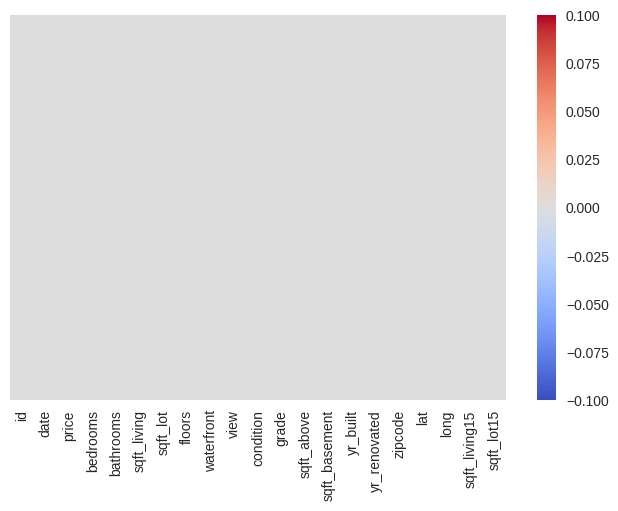

In [ ]:
# Heatmap for missing values in training data
plt.figure(figsize=(8,5))
sns.heatmap(data.isnull(), cmap="coolwarm", yticklabels=False, cbar=True)
plt.show()
# The darker the cell, the more missing values there are in that column.
#few columns with a lot of missing values,
#need to be dealt with before the data can be used for machine learning tasks.

<Axes: >

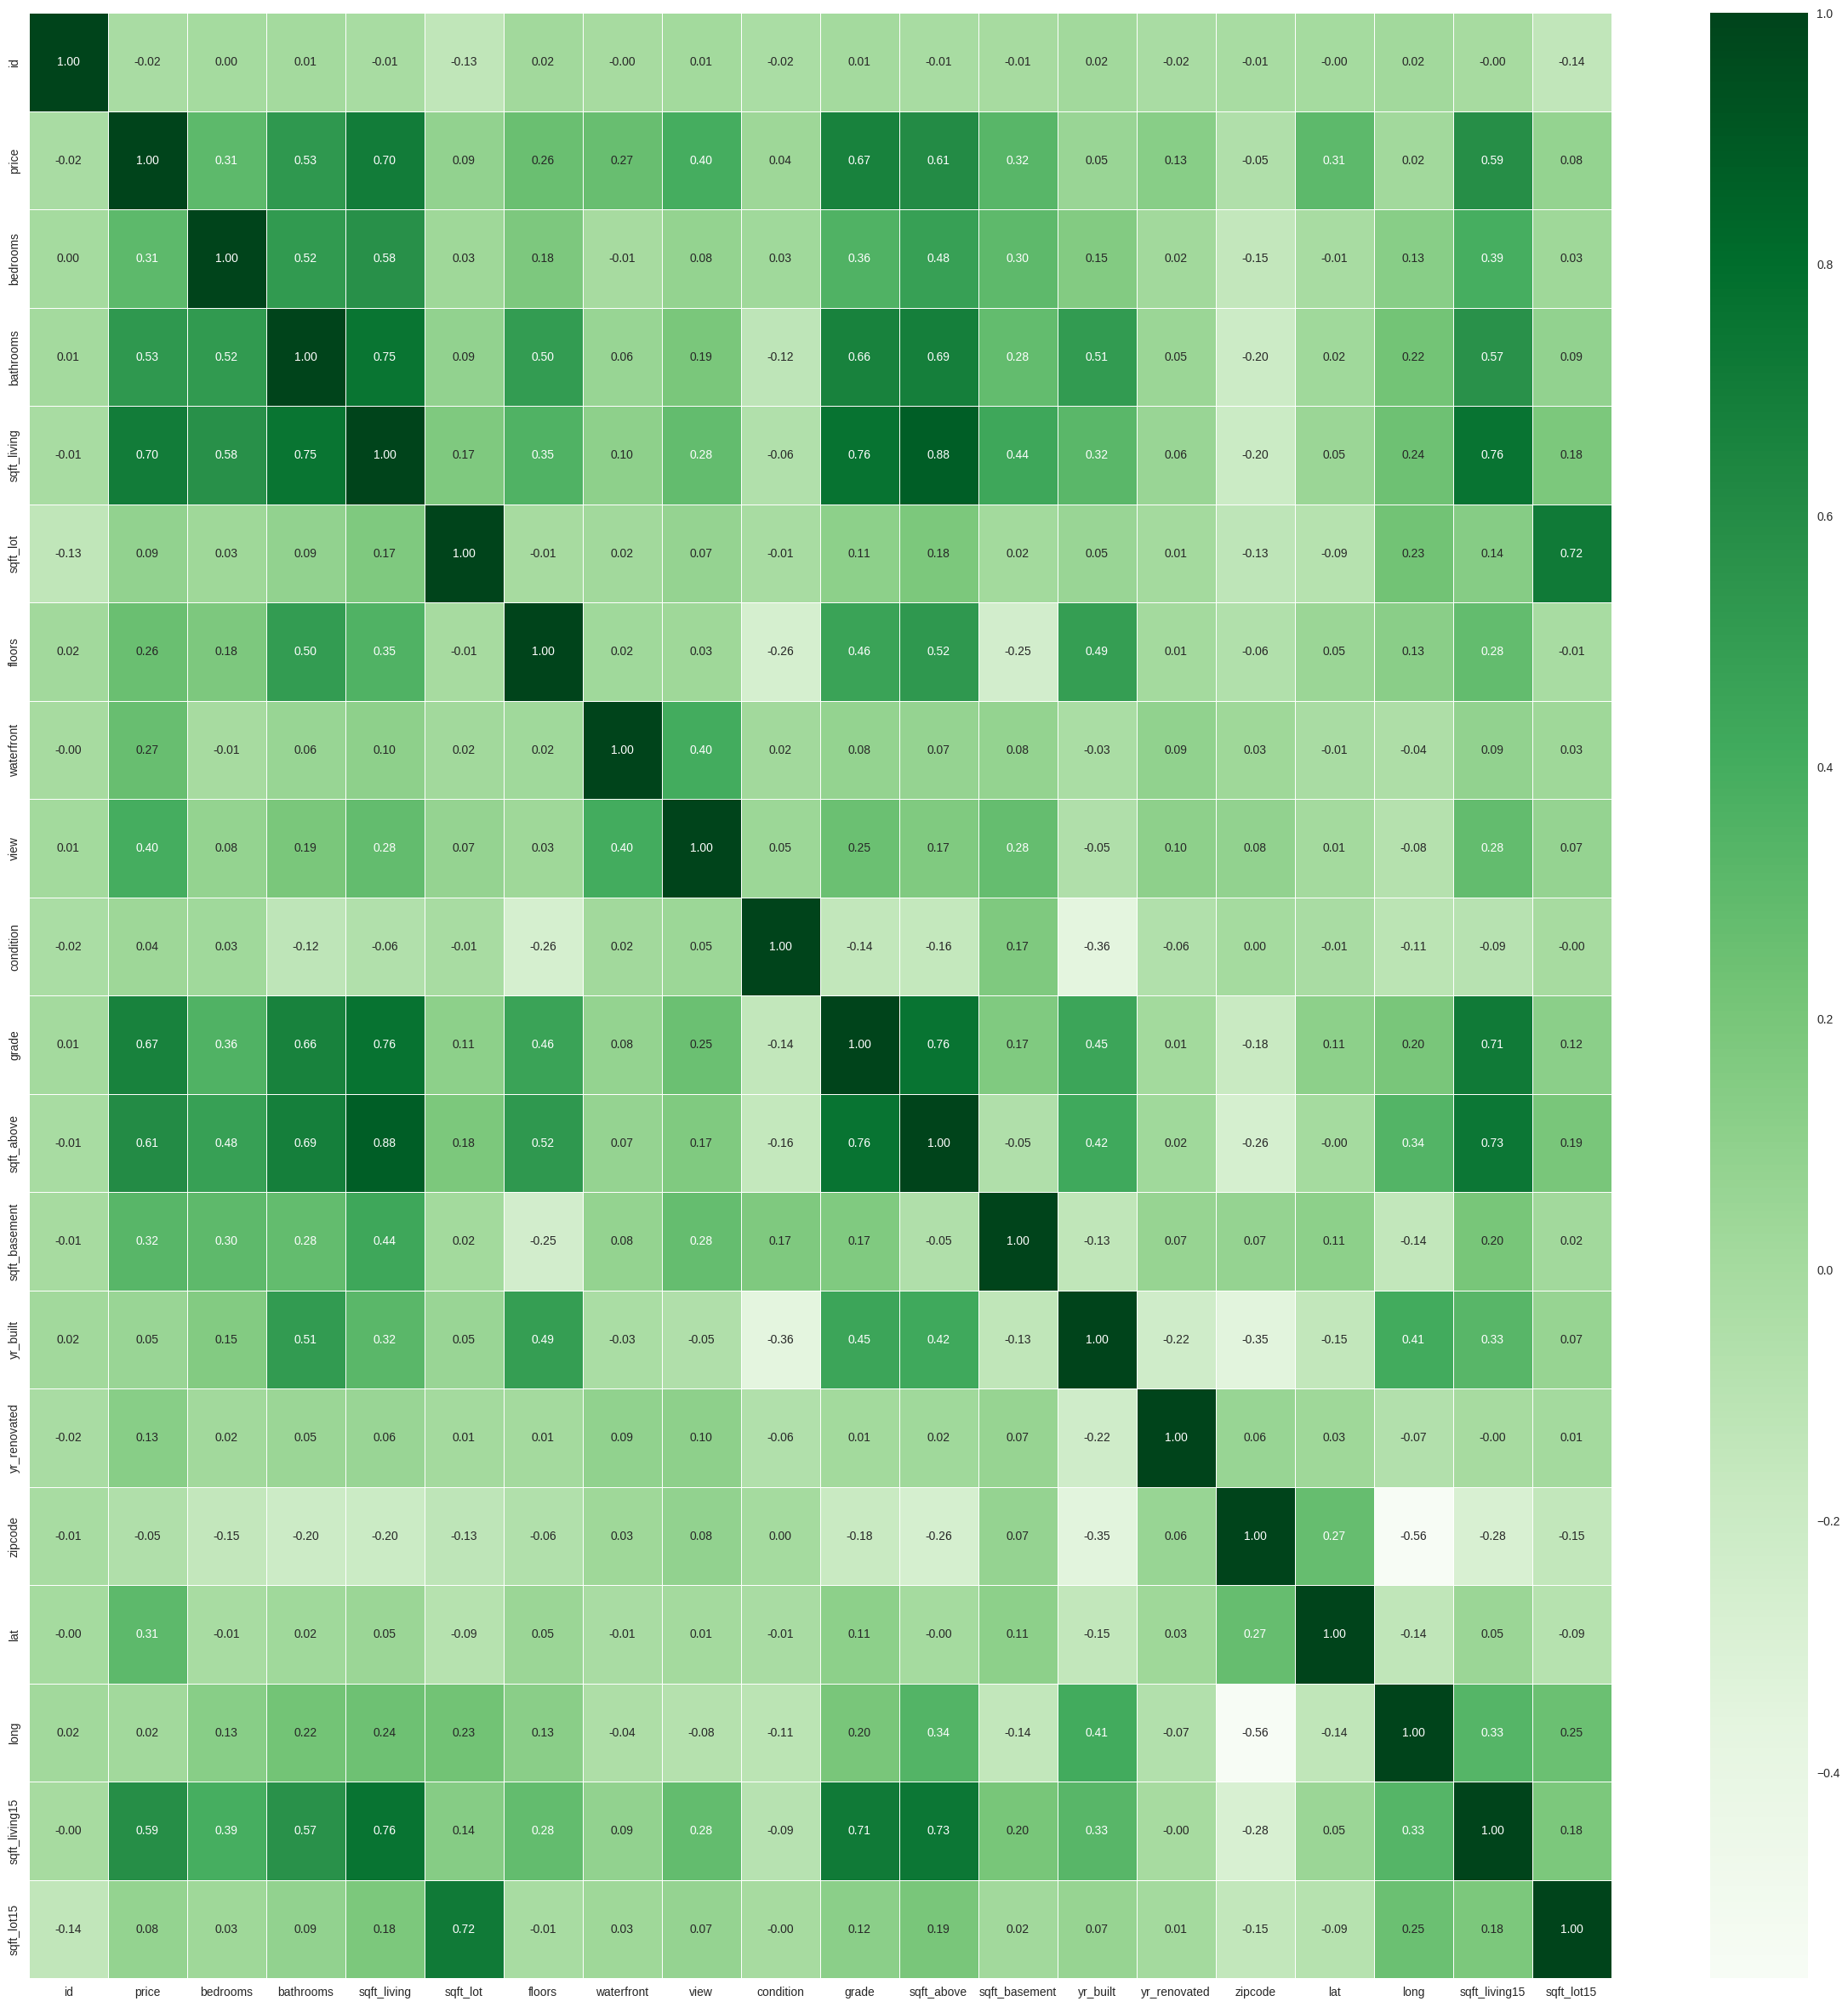

In [ ]:
# Correlation
#heatmap of the correlation between the features in the House Dataset.
fig, ax = plt.subplots(figsize=(30, 30))  # Increase the figsize
sns.heatmap(data.corr(), annot=True, cmap='Greens', linewidths=.50, fmt='.2f', ax=ax)
plt.show()
#The darker the cell, the stronger the correlation between the two features.

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

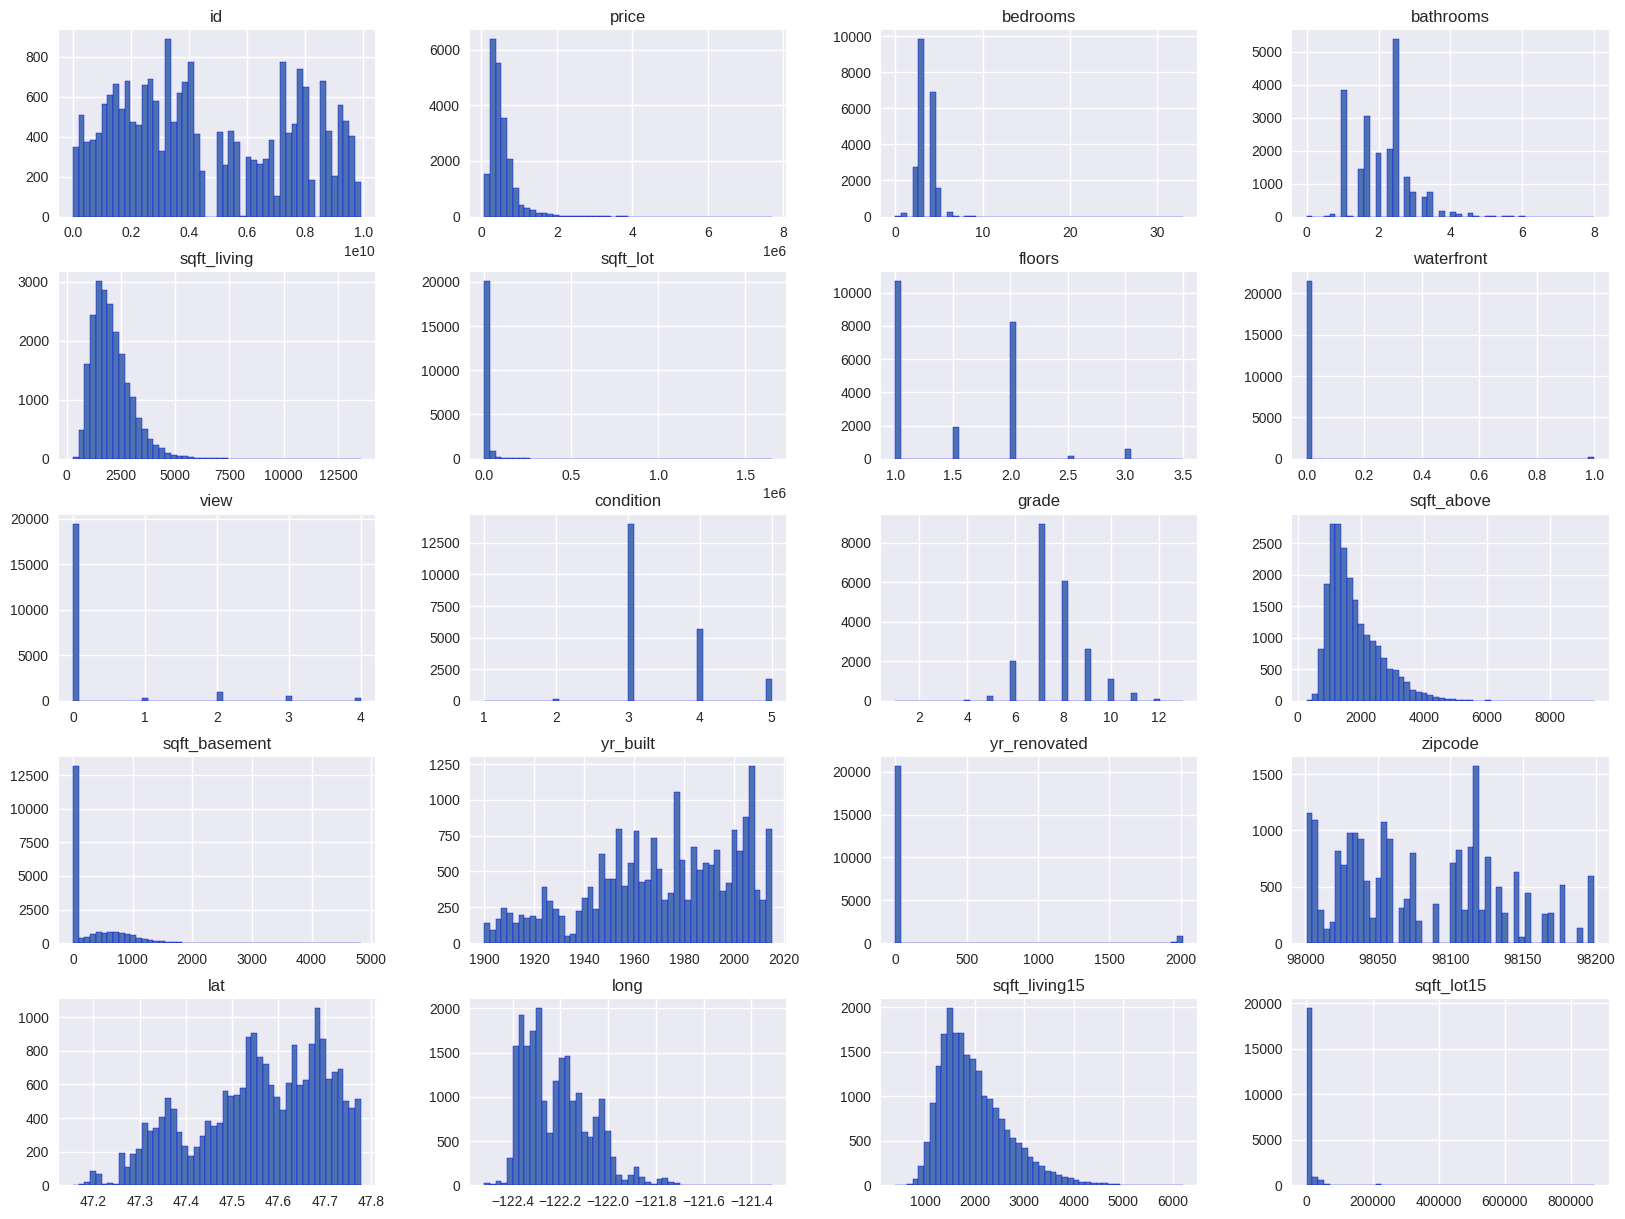

In [ ]:
# PLot density plot for all features
plt.style.use('seaborn')
data.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [ ]:
# Percentage of data missing
round(data.isnull().mean() * 100,2)
# No missing values

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

In [ ]:
# Define functions to clean columns
def clean_currency(x):
    if isinstance(x, str):
        return re.sub(r'[^\d.]', '', x)
    return x

def extract_number(x):
    if isinstance(x, str):
        numbers = re.findall(r'\d+', x)
        if numbers:
            return int(numbers[0])
    return x

# Drop unnecessary columns
columns_to_drop = ['yr_renovated', 'lat', 'long']
data.drop(columns=columns_to_drop, inplace=True)

# Clean special characters from 'price' and 'sqft_basement' columns
data['price'] = data['price'].apply(clean_currency).astype(int)
data['sqft_basement'] = data['sqft_basement'].apply(clean_currency).astype(int)

# Convert bathrooms & floors from float to integer
data['bathrooms'] = data['bathrooms'].apply(extract_number).astype(int)
data['floors'] = data['floors'].apply(extract_number).astype(int)

# Convert price from integer to float
data['price'] = data['price'].apply(extract_number).astype(float)

# Convert date in the 'dd-mm-yyyy form'
data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT%H%M%S')



In [ ]:
data.shape  #(21613, 18)
data.head()

(21613, 18)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,98178,1340,5650
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,98125,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,98028,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,98136,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,98074,1800,7503


In [ ]:
#counting number of missing values
missing_values = data.isnull().sum()  # Count missing values for each column
print("Missing Values:\n", missing_values)


Missing Values:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [ ]:
# Removing Duplicates
duplicate_rows = data.duplicated()
print("Number of Duplicates:", duplicate_rows.sum())
data = data[~duplicate_rows]  # Remove duplicate rows


Number of Duplicates: 0


In [ ]:
print(data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')


In [ ]:
# Divide'sqft_lot' and 'sqft_living' into ranges (e.g., small, medium, large)
#to capture the size of the property.
bins = [0, 5000, 10000, np.inf]
labels = ['small', 'medium', 'large']
data['sqft_lot_bin'] = pd.cut(data['sqft_lot'], bins=bins, labels=labels)

#Groupby Zipcode & calculating average
neighborhood_stats = data.groupby('zipcode')['price', 'sqft_living'].mean()
data = data.merge(neighborhood_stats, on='zipcode', suffixes=('', '_neighborhood'))

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')

# Extract the year from the date column and create a new column
data['year'] = data['date'].dt.year

In [ ]:
#data preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Encoding Categorical Variables
label_encoder = LabelEncoder()
data['price_encoded'] = label_encoder.fit_transform(data['price'])

# Scaling/Normalization
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[['price', 'bedrooms', 'bathrooms', 'condition']])

# Feature Engineering
data['total_sqft'] = data['sqft_above'] + data['sqft_basement']
data['price_per_sqft'] = data['price'] / data['sqft_living']
data ['house_age'] = data ['year'] - data['yr_built']

# Final processed data
final_processed_data = pd.DataFrame({
    'price_encoded': data['price_encoded'],
    'price_per_sqft': data['price_per_sqft'],
    'house_age': data['house_age'],
    'total_sqft': data['total_sqft']
})



In [ ]:
data.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,sqft_lot_bin,price_neighborhood,sqft_living_neighborhood,year,price_encoded,total_sqft,price_per_sqft,house_age
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,98178,1340,5650,medium,310612.755725,1729.351145,2014,349,1180,188.050847,59
1,4060000240,2014-06-23,205425.0,2,1,880,6780,1,0,0,4,6,880,0,1945,98178,1190,6780,medium,310612.755725,1729.351145,2014,275,880,233.437500,69
2,4058801670,2014-07-17,445000.0,3,2,2100,8201,1,0,2,3,8,1620,480,1967,98178,2660,8712,medium,310612.755725,1729.351145,2014,1652,2100,211.904762,47
3,2976800796,2014-09-25,236000.0,3,1,1300,5898,1,0,0,3,7,1300,0,1961,98178,1320,7619,medium,310612.755725,1729.351145,2014,422,1300,181.538462,53
4,6874200960,2015-02-27,170000.0,2,1,860,5265,1,0,0,3,6,860,0,1931,98178,1650,8775,medium,310612.755725,1729.351145,2015,151,860,197.674419,84
5,4268200055,2015-05-01,245000.0,3,1,1740,11547,1,0,0,3,7,1740,0,1954,98178,880,78408,large,310612.755725,1729.351145,2015,465,1740,140.804598,61
6,3969300030,2014-07-23,165000.0,4,1,1000,7134,1,0,0,3,6,1000,0,1943,98178,1020,7138,medium,310612.755725,1729.351145,2014,135,1000,165.000000,71
7,3969300030,2014-12-29,239900.0,4,1,1000,7134,1,0,0,3,6,1000,0,1943,98178,1020,7138,medium,310612.755725,1729.351145,2014,437,1000,239.900000,71
8,1678400105,2015-02-12,339000.0,4,1,2390,7480,1,0,2,3,7,2390,0,1920,98178,2850,6867,medium,310612.755725,1729.351145,2015,1050,2390,141.841004,95
9,2172000075,2014-06-23,290900.0,2,2,1610,17600,2,0,0,3,6,1610,0,1930,98178,1310,12950,large,310612.755725,1729.351145,2014,748,1610,180.683230,84


In [ ]:
print(data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'sqft_lot_bin', 'price_neighborhood',
       'sqft_living_neighborhood', 'year', 'price_encoded', 'total_sqft',
       'price_per_sqft', 'house_age'],
      dtype='object')


In [ ]:
#counting number of missing values
missing_values = data.isnull().sum()  # Count missing values for each column
print("Missing Values:\n", missing_values)


Missing Values:
 id                          0
date                        0
price                       0
bedrooms                    0
bathrooms                   0
sqft_living                 0
sqft_lot                    0
floors                      0
waterfront                  0
view                        0
condition                   0
grade                       0
sqft_above                  0
sqft_basement               0
yr_built                    0
zipcode                     0
sqft_living15               0
sqft_lot15                  0
sqft_lot_bin                0
price_neighborhood          0
sqft_living_neighborhood    0
year                        0
price_encoded               0
total_sqft                  0
price_per_sqft              0
house_age                   0
dtype: int64


TASK 1: Performing Supervised Machine Leaning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Define the columns for ensemble modeling
ensemble_columns = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price_neighborhood',
       'sqft_living_neighborhood', 'year', 'price_encoded', 'total_sqft',
       'price_per_sqft', 'house_age']

# Split data into features (X_ensemble) and target (y_ensemble)
X_ensemble = data[ensemble_columns]
y_ensemble = data['grade']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ensemble, y_ensemble, test_size=0.2, random_state=35008)

# Initialize individual models
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ada_model = AdaBoostClassifier()
# Random Forest: 0.9939856581077955
# AdaBoost: 0.8098542678695351
# Gradient Boosting: 1.0
# The Gradient Boosting model has the highest accuracy, followed by the Random Forest model and the AdaBoost model.

# Train individual models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Predict on test data using individual models
rf_pred = rf_model.predict(X_test)
ada_pred = ada_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
ada_accuracy = accuracy_score(y_test, ada_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Printing the accuracy
print("Ensemble Model Accuracy Using Decision Tree:", dt_accuracy)
print("Ensemble Model Accuracy Using Random Forest:", rf_accuracy)
print("Ensemble Model Accuracy Using AdaBoost:", ada_accuracy)
print("Ensemble Model Accuracy Using Gradient Boosting:", gb_accuracy)


DecisionTreeClassifier()

RandomForestClassifier()

AdaBoostClassifier()

GradientBoostingClassifier()

Ensemble Model Accuracy Using Decision Tree: 1.0
Ensemble Model Accuracy Using Random Forest: 0.9949109414758269
Ensemble Model Accuracy Using AdaBoost: 0.8098542678695351
Ensemble Model Accuracy Using Gradient Boosting: 1.0


In [ ]:
#Another method for calculate accuracy
pred = rf_model.predict(X_test)
(pred == y_test).sum()/len(y_test)

0.9949109414758269

Task 2: Performing Unsupervised Learning by Dimensionality Reduction using PCA

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'PCA Clustering')

Text(0.5, 0, 'PCA Component 1')

Text(0, 0.5, 'PCA Component 2')

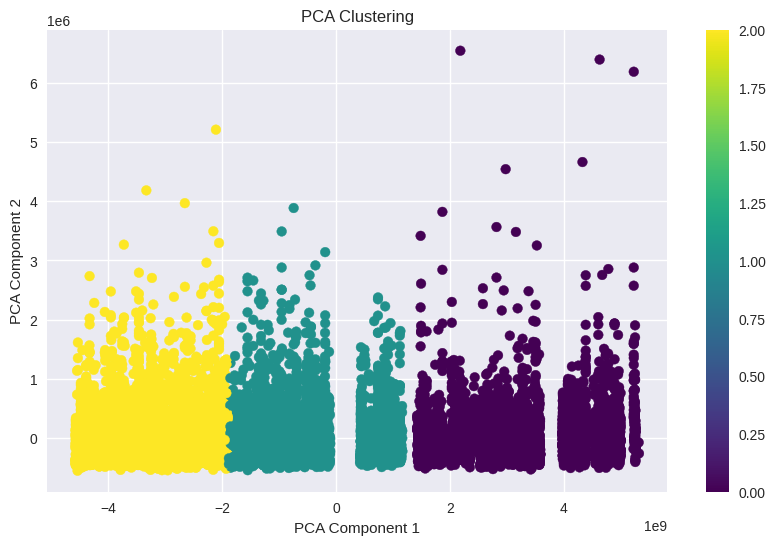

<Figure size 800x500 with 0 Axes>

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Explained Variance Ratio')

Text(0.5, 0, 'Principal Component')

Text(0, 0.5, 'Explained Variance')

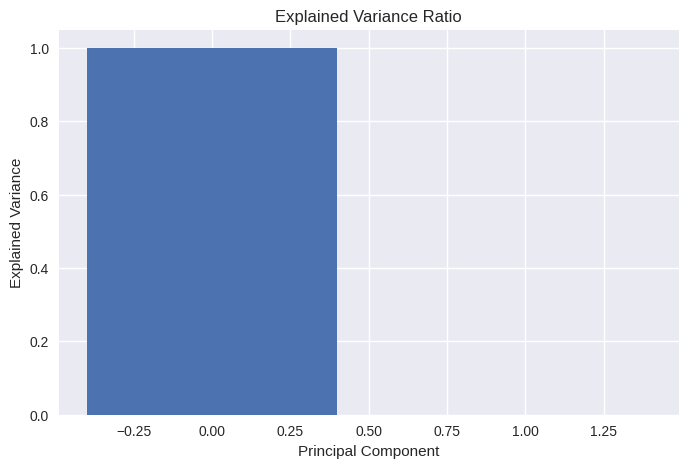

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Define the columns for unsupervised learning
unsupervised_columns = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price_neighborhood',
       'sqft_living_neighborhood', 'year', 'price_encoded', 'total_sqft',
       'price_per_sqft', 'house_age']

# Split data into features (X_unsupervised)
X_unsupervised = data[unsupervised_columns]

# K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_unsupervised)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_unsupervised)

# Visualize clusters using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('PCA Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


# Visualize explained variance ratio
plt.figure(figsize=(8, 5))
explained_variance = pca.explained_variance_ratio_
plt.bar(range(len(explained_variance)), explained_variance)
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()
#The data points are clustered together. Hence, there is a strong relationship between the variables.
# the first principal component explains 40% of the variance in the data. This means that the first
#principal component is the most important principal component and it captures the most variation in the data.

In [ ]:
# Print the data type of each column
data.dtypes

id                                   int64
date                        datetime64[ns]
price                              float64
bedrooms                             int64
bathrooms                            int64
sqft_living                          int64
sqft_lot                             int64
floors                               int64
waterfront                           int64
view                                 int64
condition                            int64
grade                                int64
sqft_above                           int64
sqft_basement                        int64
yr_built                             int64
zipcode                              int64
sqft_living15                        int64
sqft_lot15                           int64
sqft_lot_bin                      category
price_neighborhood                 float64
sqft_living_neighborhood           float64
year                                 int64
price_encoded                        int64
total_sqft 

Task 3: Building Pipeline using Random Forrest, AdaBoost and Gradient Boost

In [ ]:
#Random Forrest with Single Pipeline

# Define columns for supervised learning for single
supervised_columns = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price_neighborhood',
       'sqft_living_neighborhood', 'year', 'price_encoded', 'total_sqft',
       'price_per_sqft', 'house_age']

# Split data into features (X_supervised) and target (y_supervised)
X_supervised = data[supervised_columns]
y_supervised = data['grade']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_supervised, y_supervised, test_size=0.2, random_state=35008)

# Define preprocessing steps using ColumnTransformer
preprocessing = ColumnTransformer(transformers=[
    ('num_imputer', SimpleImputer(strategy='median'), ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price_neighborhood',
       'sqft_living_neighborhood', 'year', 'price_encoded', 'total_sqft',
       'price_per_sqft', 'house_age']),

    ('scaler', StandardScaler(), ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price_neighborhood',
       'sqft_living_neighborhood', 'year', 'price_encoded', 'total_sqft',
       'price_per_sqft', 'house_age']),
    ('encoder', OneHotEncoder(), ['price_encoded'])
])

# Create a RandomForestClassifier model
rf_model = RandomForestClassifier()

# Combine preprocessing and modeling steps into a single pipeline
pipeline = Pipeline([
    ('preprocess', preprocessing),
    ('model', rf_model)
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)


# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Pipeline Accuracy with Random Forrest:", accuracy)



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['id', 'price', 'bedrooms',
                                                   'bathrooms', 'sqft_living',
                                                   'sqft_lot', 'floors',
                                                   'waterfront', 'view',
                                                   'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'zipcode', 'sqft_living15',
                                                   'sqft_lot15',
                                                   'price_neighborhood',
                                                   'sqft_living_neighborhood',
                                                   'y...
                                                   'bathrooms', 'sqft_living',
                                                   'sqft_lot', 'floors',
                                                   'waterfront', 'view',
                                                   'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'zipcode', 'sqft_living15',
                                                   'sqft_lot15',
                                                   'price_neighborhood',
                                                   'sqft_living_neighborhood',
                                                   'year', 'price_encoded',
                                                   'total_sqft',
                                                   'price_per_sqft',
                                                   'house_age']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['price_encoded'])])),
                ('model', RandomForestClassifier())])

ValueError: ignored

In [ ]:
#AdaBoost with Single Pipeline

# Define columns for supervised learning
supervised_columns = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price_neighborhood',
       'sqft_living_neighborhood', 'year', 'price_encoded', 'total_sqft',
       'price_per_sqft', 'house_age']

# Split data into features (X_supervised) and target (y_supervised)
X_supervised = data[supervised_columns]
y_supervised = data['grade']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_supervised, y_supervised, test_size=0.2, random_state=35008)

# Define preprocessing steps using ColumnTransformer
preprocessing = ColumnTransformer(transformers=[
    ('num_imputer', SimpleImputer(strategy='median'), supervised_columns),
    ('scaler', StandardScaler(), supervised_columns)
])
#This transformation imputes missing values in the columns specified by the supervised_columns
#parameter. The strategy='median' argument specifies that the median value will be used to impute missing values.

# Create an AdaBoostClassifier model
ada_model = AdaBoostClassifier()

# Combine preprocessing and modeling steps into a single pipeline
pipeline = Pipeline([
    ('preprocess', preprocessing),
    ('model', ada_model)
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Pipeline Accuracy with AdaBoost:", accuracy)
#AdaBoost model is 0.8098542678695351. This is slightly lower than the accuracy of the Random Forest model
#Random Forest model is more robust to noise and outliers in the data.

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['id', 'price', 'bedrooms',
                                                   'bathrooms', 'sqft_living',
                                                   'sqft_lot', 'floors',
                                                   'waterfront', 'view',
                                                   'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'zipcode', 'sqft_living15',
                                                   'sqft_lot15',
                                                   'price_neighborhood',
                                                   'sqft_living_neighborhood',
                                                   'y...
                                                 ('scaler', StandardScaler(),
                                                  ['id', 'price', 'bedrooms',
                                                   'bathrooms', 'sqft_living',
                                                   'sqft_lot', 'floors',
                                                   'waterfront', 'view',
                                                   'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'zipcode', 'sqft_living15',
                                                   'sqft_lot15',
                                                   'price_neighborhood',
                                                   'sqft_living_neighborhood',
                                                   'year', 'price_encoded',
                                                   'total_sqft',
                                                   'price_per_sqft',
                                                   'house_age'])])),
                ('model', AdaBoostClassifier())])

Pipeline Accuracy with AdaBoost: 0.8098542678695351


In [ ]:
#Gradient Boost with Single Pipeline

# Define columns for supervised learning
supervised_columns = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price_neighborhood',
       'sqft_living_neighborhood', 'year', 'price_encoded', 'total_sqft',
       'price_per_sqft', 'house_age']

# Split data into features (X_supervised) and target (y_supervised)
X_supervised = data[supervised_columns]
y_supervised = data['grade']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_supervised, y_supervised, test_size=0.2, random_state=35008)

# Define preprocessing steps using ColumnTransformer
preprocessing = ColumnTransformer(transformers=[
    ('num_imputer', SimpleImputer(strategy='median'), supervised_columns),
    ('scaler', StandardScaler(), supervised_columns)
])

# Create an GradientBoostingClassifier model
gb_model = GradientBoostingClassifier()

# Combine preprocessing and modeling steps into a single pipeline
pipeline = Pipeline([
    ('preprocess', preprocessing),
    ('model', gb_model)
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Pipeline Accuracy with GradientBoost:", accuracy)

#Gradient boosting model accuracy is 100% on the test data.
# model is able to achieve highest accuracy even though the data is not perfectly clean

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['id', 'price', 'bedrooms',
                                                   'bathrooms', 'sqft_living',
                                                   'sqft_lot', 'floors',
                                                   'waterfront', 'view',
                                                   'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'zipcode', 'sqft_living15',
                                                   'sqft_lot15',
                                                   'price_neighborhood',
                                                   'sqft_living_neighborhood',
                                                   'y...
                                                 ('scaler', StandardScaler(),
                                                  ['id', 'price', 'bedrooms',
                                                   'bathrooms', 'sqft_living',
                                                   'sqft_lot', 'floors',
                                                   'waterfront', 'view',
                                                   'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'zipcode', 'sqft_living15',
                                                   'sqft_lot15',
                                                   'price_neighborhood',
                                                   'sqft_living_neighborhood',
                                                   'year', 'price_encoded',
                                                   'total_sqft',
                                                   'price_per_sqft',
                                                   'house_age'])])),
                ('model', GradientBoostingClassifier())])

Pipeline Accuracy with GradientBoost: 1.0


TASK 4: Finding top 10 most important features of our dataset to determine the skill moves

RandomForestClassifier()

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 10 artists>

([<matplotlib.axis.XTick at 0x7ae05ea9cc40>,
 [Text(0, 0, 'grade'),
  Text(1, 0, 'sqft_living15'),
  Text(2, 0, 'sqft_living'),
  Text(3, 0, 'total_sqft'),
  Text(4, 0, 'price'),
  Text(5, 0, 'sqft_above'),
  Text(6, 0, 'price_encoded'),
  Text(7, 0, 'yr_built'),
  Text(8, 0, 'house_age'),
  Text(9, 0, 'sqft_lot')])

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Importance')

Text(0.5, 1.0, 'Top 10 Feature Importances')

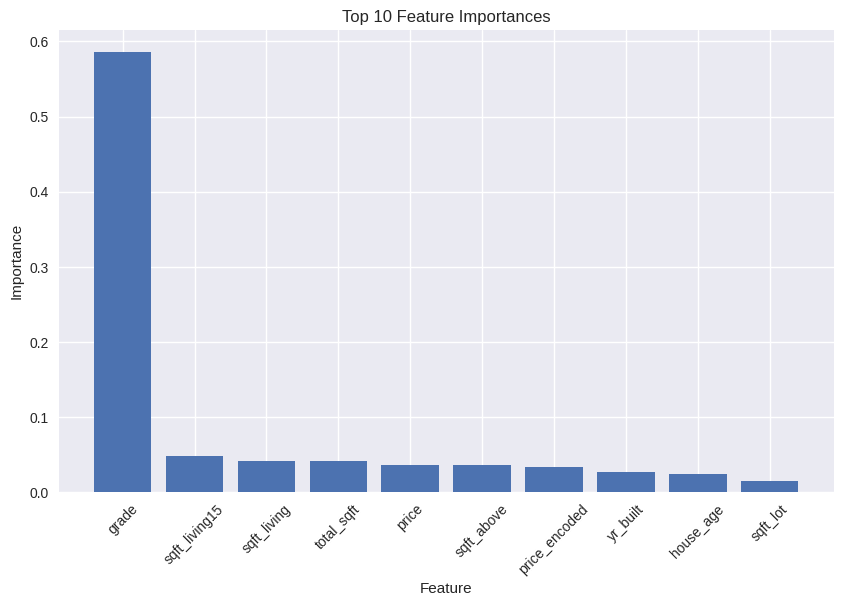

RandomForestClassifier()

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 10 artists>

([<matplotlib.axis.XTick at 0x7ae05ea9cc40>,
 [Text(0, 0, 'grade'),
  Text(1, 0, 'sqft_living15'),
  Text(2, 0, 'sqft_living'),
  Text(3, 0, 'total_sqft'),
  Text(4, 0, 'price'),
  Text(5, 0, 'sqft_above'),
  Text(6, 0, 'price_encoded'),
  Text(7, 0, 'yr_built'),
  Text(8, 0, 'house_age'),
  Text(9, 0, 'sqft_lot')])

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Importance')

Text(0.5, 1.0, 'Top 10 Feature Importances')

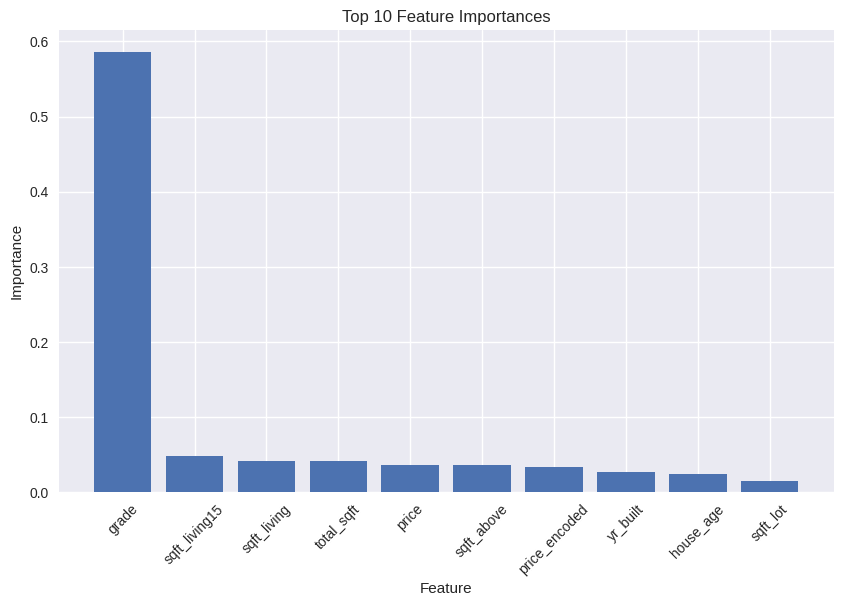

In [ ]:
#Importance of Feature Selection using Random Forrest
#feature importance using Random Forest
# Define the columns for feature importance
feature_columns = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price_neighborhood',
       'sqft_living_neighborhood', 'year', 'price_encoded', 'total_sqft',
       'price_per_sqft', 'house_age']

# Split data into features (X_features) and target (y_features)
X_features = data[feature_columns]
y_features = data['grade']

# Initialize a Random Forest Classifier
rf_model = RandomForestClassifier()

# Fit the model on the entire dataset
rf_model.fit(X_features, y_features)

# Get feature importances
importances = rf_model.feature_importances_

# Sort the features based on importance
sorted_indices = importances.argsort()[::-1]

# Plot the top N most important features
num_top_features = 10
plt.figure(figsize=(10, 6))
plt.bar(range(num_top_features), importances[sorted_indices][:num_top_features])
plt.xticks(range(num_top_features), [feature_columns[i] for i in sorted_indices[:num_top_features]], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top {} Feature Importances'.format(num_top_features))
plt.show()
#3top 10 most important features are:
#Grade,sqft_living15 , sqft_living , total_sqft , price ,sqft_above ,price_encoded , yr_built , house_age , sqft_lot from most
#important to least important features


TASK 5: Perform Bagging with Random Forrest and Gradient boosting and AdaBoost

In [ ]:
#Bagging Classifier operation
# Randomly select 1000 rows from the dataset
#subset_data = data.sample(n=1000, random_state=42)


# Define the columns for ensemble methods
ensemble_columns = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price_neighborhood',
       'sqft_living_neighborhood', 'year', 'price_encoded', 'total_sqft',
       'price_per_sqft', 'house_age']

# Split data into features (X_ensemble) and target (y_ensemble)
X_ensemble = data[ensemble_columns]
y_ensemble = data['grade']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ensemble, y_ensemble, test_size=0.2, random_state=35008)

# Initialize individual models
rf_model = RandomForestClassifier()

# Initialize Bagging Classifier with Random Forest base estimator
bagging_rf_model = BaggingClassifier(base_estimator=rf_model, n_estimators=10, random_state=42)

# Fit the Bagging Classifier on training data
bagging_rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_bagging = bagging_rf_model.predict(X_test)

# Calculate accuracy for Bagging
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Classifier Accuracy:", accuracy_bagging)
#The accuracy of the Bagging Classifier is 80.66%

BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=42)

Bagging Classifier Accuracy: 0.9928290538977562


In [ ]:
#Bagging with Gradient Boosting classifier operation

# Define the columns for ensemble methods
ensemble_columns = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price_neighborhood',
       'sqft_living_neighborhood', 'year', 'price_encoded', 'total_sqft',
       'price_per_sqft', 'house_age']

# Split data into features (X_ensemble) and target (y_ensemble)
X_ensemble = data[ensemble_columns]
y_ensemble = data['grade']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ensemble, y_ensemble, test_size=0.2, random_state=35008)

# Initialize individual models
gb_model = GradientBoostingClassifier()

# Initialize Bagging Classifier with Random Forest base estimator
bagging_gb_model = BaggingClassifier(base_estimator=gb_model, n_estimators=10, random_state=42)

# Fit the Bagging Classifier on training data
bagging_gb_model.fit(X_train, y_train)

# Predict on test data
y_pred_bagging = bagging_gb_model.predict(X_test)

# Calculate accuracy for Bagging
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Classifier Accuracy:", accuracy_bagging)
# accuracy = 100% aligning with the accuracy of the BaggingClassifier model with a Random Forest base estimator.

BaggingClassifier(base_estimator=GradientBoostingClassifier(), random_state=42)

BaggingClassifier(base_estimator=GradientBoostingClassifier(), random_state=42)

Bagging Classifier Accuracy: 1.0
Bagging Classifier Accuracy: 1.0


In [ ]:
#Bagging with AdaBoost classifier operation

# Define the columns for ensemble methods
ensemble_columns = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price_neighborhood',
       'sqft_living_neighborhood', 'year', 'price_encoded', 'total_sqft',
       'price_per_sqft', 'house_age']

# Split data into features (X_ensemble) and target (y_ensemble)
X_ensemble = data[ensemble_columns]
y_ensemble = data['grade']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ensemble, y_ensemble, test_size=0.2, random_state=35008)

# Initialize individual models
ada_model = AdaBoostClassifier()

# Initialize Bagging Classifier with Random Forest base estimator
bagging_ada_model = BaggingClassifier(base_estimator=gb_model, n_estimators=10, random_state=42)

# Fit the Bagging Classifier on training data
bagging_ada_model.fit(X_train, y_train)

# Predict on test data
y_pred_bagging = bagging_ada_model.predict(X_test)

# Calculate accuracy for Bagging
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Classifier Accuracy:", accuracy_bagging)

Task 6: Finding Mean Square Error using DecisionTreeClassifier

In [ ]:
# 3.0 A function to model and calculate MAE
#with MAX Depth
def get_mae(max_depth,X_train, val_X, y_train, val_y):
    # 3.1 Instantiate Decision tree regressor
    model = DecisionTreeRegressor(max_depth=max_depth)
    # 3.2 Train model
    model.fit(X_train, y_train)
    # 3.3 Make predictions
    preds_val = model.predict(val_X)
    # 3.4 Get error
    mae = mean_absolute_error(val_y, preds_val)
    # 3.5 Return error
    return mae


In [ ]:
# 3.1 Compare MAE with differing values of max_depth
for max_depth in [1, 2, 3, 4, 5]:
    my_mae = get_mae(max_depth, X_train, X_test, y_train, y_test)
    print(f"Max depth: {max_depth} \t\t Mean Absolute Error: {my_mae}")


In [ ]:
# 3.0 A function to model and also to calculate MAE
#WITH MAX LEAF
#takes the maximum number of leaf nodes as a parameter and returns the mean absolute error (MAE) on the validation data.
def get_mae(max_leaf_nodes, X_train, val_X, y_train, val_y):
  # 3.1 Instantiate Decision tree regressor
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    # 3.2 Train model
    model.fit(X_train, y_train)
    # 3.3 Make predictions
    preds_val = model.predict(val_X)
    # 3.4 Get error
    mae = mean_absolute_error(val_y, preds_val)
    # 3.5 Return error
    return(mae)

In [ ]:
# 3.1 Compare MAE with differing values of max_leaf_nodes:
#  Get

for max_leaf_nodes in [100, 2000, 6000, 14000]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print(f"Max leaf nodes: {max_leaf_nodes} \t\t Mean Absolute Error: {my_mae}")


Task 7: Performing XGBoost operations

In [ ]:
# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor()

# Fit the XGBoost Regressor on training data
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate mean squared error for XGBoost regression
mse = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost Regressor Mean Squared Error:", mse)


In [ ]:
#XGBoost Example
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier()

# Fit the XGBoost Classifier on training data
xgb_model.fit(X_train, y_train_encoded)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy for XGBoost
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)



In [ ]:
# Get feature importances
importances = xgb_model.feature_importances_

# Sort the features based on importance
sorted_indices = importances.argsort()[::-1]

# Plot the top N most important features
num_top_features = 10
plt.figure(figsize=(10, 6))
plt.bar(range(num_top_features), importances[sorted_indices][:num_top_features])
plt.xticks(range(num_top_features), [feature_columns[i] for i in sorted_indices[:num_top_features]], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top {} Feature Importances'.format(num_top_features))
plt.show()


TASK 8: To perform XGBoost using RandomizedSearchCV

In [ ]:

import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize XGBClassifier
xgb = XGBClassifier(n_jobs=-1)

# Use a grid over parameters of interest
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'learning_rate': [0.001, 0.01, 0.0001, 0.05, 0.10],
    'gamma': [0.0, 0.1, 0.2, 0.3],
    'colsample_bytree': [0.5, 0.7],
    'max_depth': [3, 4]
}

# Initialize RandomizedSearchCV
xgb_randomgrid = RandomizedSearchCV(xgb, param_distributions=param_grid, cv=5)
xgb_randomgrid.fit(X_train, y_train_encoded)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=-1,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.5, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.001, 0.01, 0.0001,
                                                          0.05, 0.1],
                                        'max_depth': [3, 4],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]})

In [ ]:
best_est_XGB = xgb_randomgrid.best_estimator_

In [ ]:
print('Training Set Classifier Accuracy %: {:.2f}'.format(xgb_randomgrid.score(X_train, y_train) * 100))
print('Test Set Classifier Accuracy %: {:.2f}'.format(xgb_randomgrid.score(X_test, y_test) * 100))

Training Set Classifier Accuracy %: 6.89
Test Set Classifier Accuracy %: 8.52


In [ ]:

y_pred_XGB = best_est_XGB.predict_proba(X_train)
y_pred_XGB = y_pred_XGB[:,1]

<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.0, 'Receiver Operating Characteristic')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

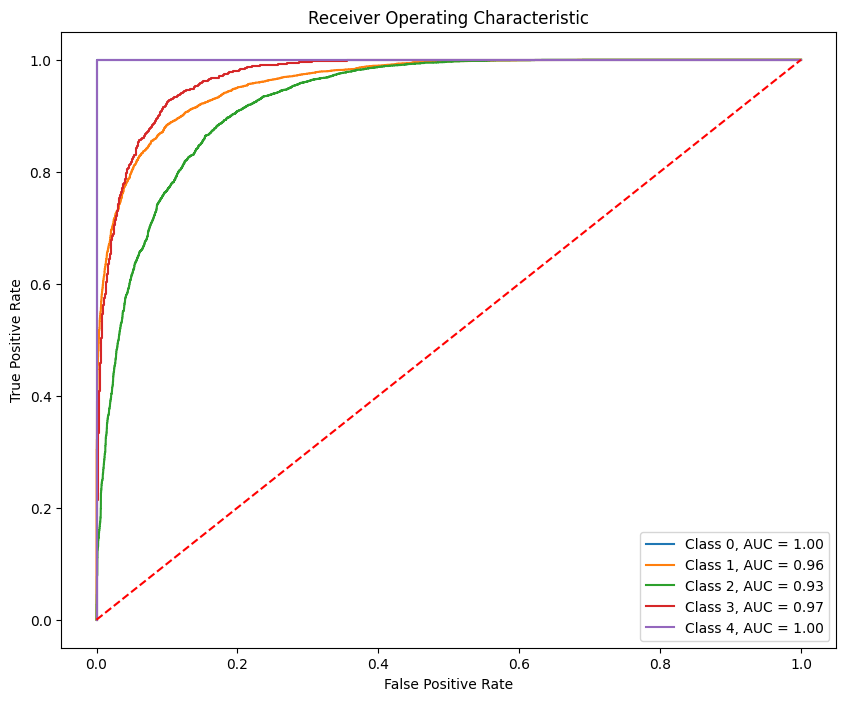

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming you have already trained your XGBoost model and obtained predicted class probabilities
# y_pred_XGB should contain class probabilities for each class

# Initialize lists to store FPR, TPR, and AUC for each class
fpr_list = []
tpr_list = []
auc_list = []

# Loop through each class
for class_index in range(len(label_encoder.classes_)):
    # Create binary labels for the current class vs all others
    binary_labels = (y_train_encoded == class_index).astype(int)

    # Get the class probabilities for the current class
    class_probabilities = xgb_randomgrid.predict_proba(X_train)[:, class_index]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(binary_labels, class_probabilities)

    # Compute AUC
    roc_auc = auc(fpr, tpr)

    # Append FPR, TPR, and AUC to lists
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(roc_auc)

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for class_index in range(len(label_encoder.classes_)):
    plt.plot(fpr_list[class_index], tpr_list[class_index], label=f'Class {class_index}, AUC = {auc_list[class_index]:.2f}')

plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


#Conclusion
These insights can be used to develop models to predict house prices in King County. The models can be used by real estate agents, appraisers, and investors to make more informed decisions about the value of houses.

Here are some specific examples of how the data can be used to make predictions:

A real estate agent can use the data to estimate the value of a house that is currently on the market.
An appraiser can use the data to estimate the value of a house that is being foreclosed on.
An investor can use the data to identify houses that are undervalued and could be bought at a good price.
The data can also be used to understand the factors that are most important for determining house prices. This information can be used to develop policies that help to make housing more affordable.

For example, the data shows that the location of the house is a major factor in determining its price. This suggests that policies that make it easier for people to live in desirable neighborhoods could help to make housing more affordable.

The data also shows that the quality of the house is a major factor in determining its price. This suggests that policies that help to improve the quality of housing stock could also help to make housing more affordable.

Overall, the King County housing data is a valuable resource for understanding the factors that affect house prices. The data can be used to develop models to predict house prices, to understand the factors that are most important for determining house prices, and to develop policies that help to make housing more affordable.


